In [1]:
#load dataset
import pandas as pd

df = pd.read_csv("week3_policy_data.csv")
df.head()

,Country,%Renewable,CO2_per_capita,Region,Apply_Policy
0,Nepal,88,1.2,Asia,yes
1,Kenya,65,1.8,Africa,yes
2,Germany,45,6.5,Europe,no
3,India,25,1.9,Asia,yes
4,Australia,35,17.0,Oceania,no


In [7]:
#

df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         10 non-null     object 
 1   %Renewable      10 non-null     int64  
 2   CO2_per_capita  10 non-null     float64
 3   Region          10 non-null     object 
 4   Apply_Policy    10 non-null     object 
 5   Label           10 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 612.0+ bytes


,%Renewable,CO2_per_capita,Label
count,10.000000,10.000000,10.000000
mean,48.300000,5.220000,0.600000
std,31.283826,6.057282,0.516398
min,12.000000,0.900000,0.000000
25%,21.250000,1.425000,0.000000
50%,40.000000,2.000000,1.000000
75%,76.250000,5.875000,1.000000
max,95.000000,17.000000,1.000000


In [8]:
#encode target label - conver text into numerical values yes to 1 and no to 0

df["Label"] = df["Apply_Policy"].map({"yes": 1, "no": 0})

In [15]:
 df[["Country", "Label"]] 

,Country,Label
0,Nepal,1
1,Kenya,1
2,Germany,0
3,India,1
4,Australia,0
5,Brazil,1
6,Nigeria,1
7,Sweden,0
8,Bangladesh,1
9,USA,0


## from sklearn.tree import DecisionTreeClassifier

X = df[["%Renewable", "CO2_per_capita"]]
y = df["Label"]

tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X, y)

In [16]:
from sklearn.tree import DecisionTreeClassifier

X = df[["%Renewable", "CO2_per_capita"]]
y = df["Label"]

tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


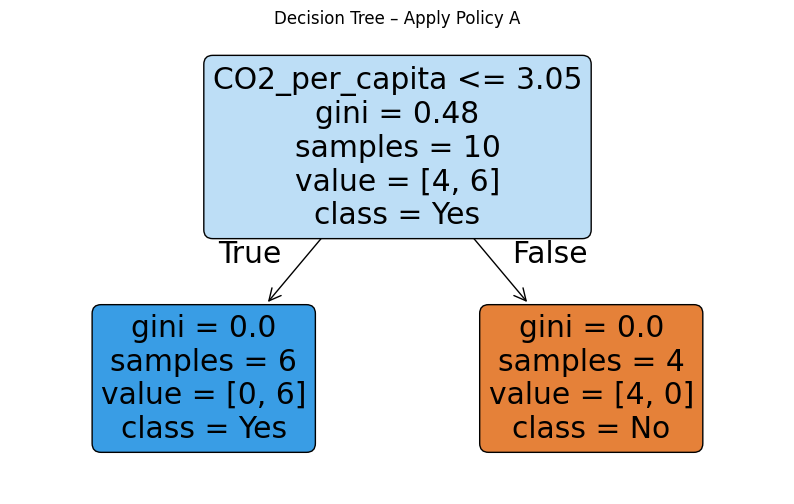

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree – Apply Policy A")
plt.show()

In [18]:
new_data = pd.DataFrame({
    "%Renewable": [52, 20, 75],
    "CO2_per_capita": [1.5, 2.5, 3.0]
})

predictions = tree.predict(new_data)
print(predictions)

[1 1 1]


In [19]:
tree.predict_proba(new_data)


array([[0., 1.],
       [0., 1.],
       [0., 1.]])